Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Importing the Dataset

In [2]:
dataset = pd.read_csv('Fraud.csv')

Data Exploration

In [3]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
dataset.shape

(6362620, 11)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
dataset.nunique().sort_values(ascending=True)

isFraud                 2
isFlaggedFraud          2
type                    5
step                  743
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
newbalanceDest    3555499
oldbalanceDest    3614697
amount            5316900
nameOrig          6353307
dtype: int64

In [7]:
target = 'isFraud'
features = [feature for feature in dataset.columns if feature not in [target]]

In [8]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


From above we will treat these as categorical features: isFlaggedFraud, type, nameOrig, nameDest

All the others we will treat as numerical features


In [9]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Performing Exploratory Data Analysis

Let's check out the distribution of out target variable i.e. isFraud

In [10]:
import seaborn as sns

c:\users\mansi\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='isFraud', ylabel='count'>

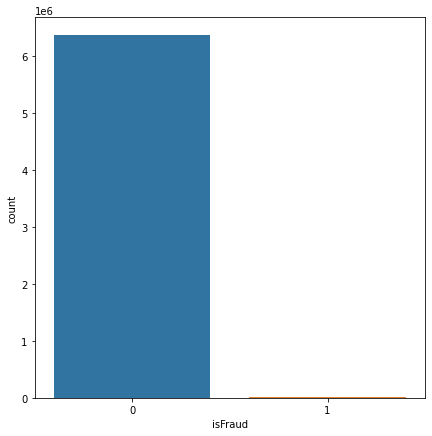

In [11]:
plt.figure(figsize=[7, 7])
sns.countplot(dataset[target])

In [12]:
dataset[target].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

Inference: As we can see from above, we are facing a big problem of class imbalance, we will need to deal with this before applying statistical techniques or training our machine learning algorithm

Now, Let's check out distribution of our categorical features.

c:\users\mansi\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='type', ylabel='count'>

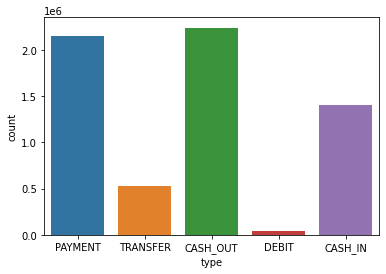

In [13]:
sns.countplot(dataset['type'])

This seems fine, but we have very low number of debit transactions, let's check the number of fraud transations in each of them

In [14]:
dataset.groupby([target, 'type']).size().unstack(fill_value=0)

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,1399284,2233384,41432,2151495,528812
1,0,4116,0,0,4097


We can see from this that there are no fraud transactions in CASH_IN(obviously), DEBIT, PAYMENT

nameOrig feature is just customer name/ID which makes it pretty irrelevent when training our models, same is probably true for nameDest

c:\users\mansi\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='isFlaggedFraud', ylabel='count'>

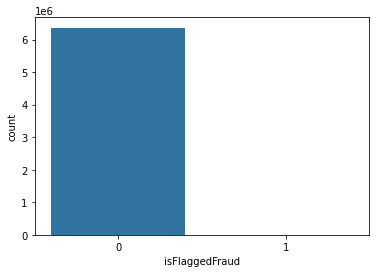

In [15]:
sns.countplot(dataset['isFlaggedFraud'])

In [16]:
dataset['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

We can see that this feature is very imbalanced and is almost irrelevent, and hence we should drop it

Let's check out numerical features now

c:\users\mansi\anaconda3\envs\project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

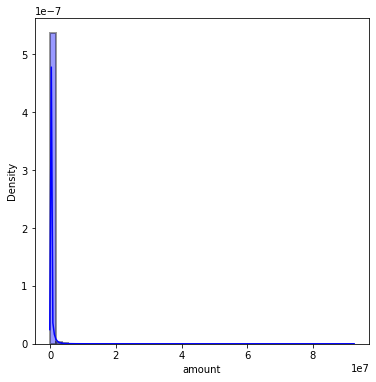

In [18]:
plt.figure(figsize=[6, 6])
sns.distplot(dataset['amount'], color='b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)

c:\users\mansi\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='amount'>

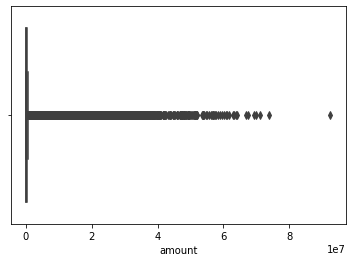

In [19]:
sns.boxplot(dataset['amount'])

In [20]:
dataset['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [21]:
from scipy.stats import zscore
dataset[target].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [22]:
dataset[np.abs(zscore(dataset['amount'])) < 3][target].value_counts()

0    6311148
1       6527
Name: isFraud, dtype: int64

There are a lot of outliers in this feature but we cannot remove much of the data because many of the outliers are associated with fraudulent transactions which are already a minority for predictive modelling

c:\users\mansi\anaconda3\envs\project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldbalanceOrg', ylabel='Density'>

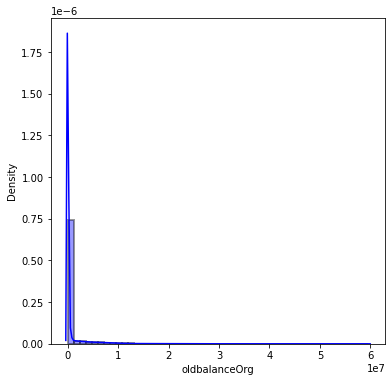

In [23]:
plt.figure(figsize=[6, 6])
sns.distplot(dataset['oldbalanceOrg'], color='b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)

c:\users\mansi\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='oldbalanceOrg'>

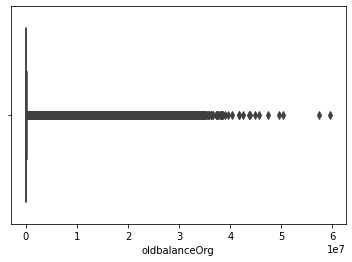

In [24]:
sns.boxplot(dataset['oldbalanceOrg'])

In [25]:
dataset['oldbalanceOrg'].describe()

count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

In [26]:
dataset[target].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [27]:
dataset[np.abs(zscore(dataset['oldbalanceOrg'])) < 3][target].value_counts()

0    6199579
1       7901
Name: isFraud, dtype: int64

We can try to remove some outliers in this case

In [28]:
dataset[np.abs(zscore(dataset['oldbalanceOrg'])) < 3].shape

(6207480, 11)

In [29]:
dataset.shape

(6362620, 11)

c:\users\mansi\anaconda3\envs\project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newbalanceOrig', ylabel='Density'>

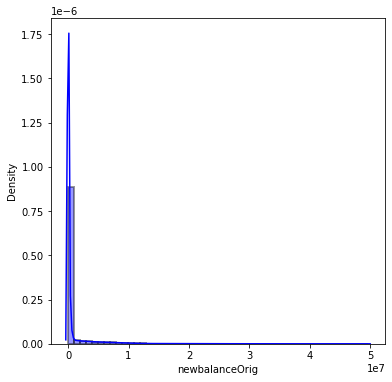

In [30]:
plt.figure(figsize=[6, 6])
sns.distplot(dataset['newbalanceOrig'], color='b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)

c:\users\mansi\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='newbalanceOrig'>

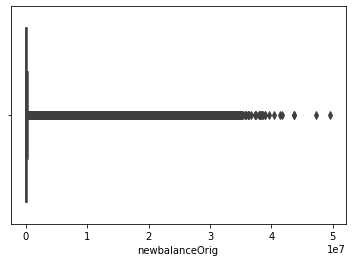

In [31]:
sns.boxplot(dataset['newbalanceOrig'])

In [32]:
dataset[target].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [33]:
dataset[np.abs(zscore(dataset['newbalanceOrig'])) < 3][target].value_counts()

0    6198533
1       8156
Name: isFraud, dtype: int64

In [34]:
dataset.shape

(6362620, 11)

In [35]:
dataset = dataset[np.abs(zscore(dataset['newbalanceOrig'])) < 3]

In [36]:
dataset.shape

(6206689, 11)

In [37]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


c:\users\mansi\anaconda3\envs\project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldbalanceDest', ylabel='Density'>

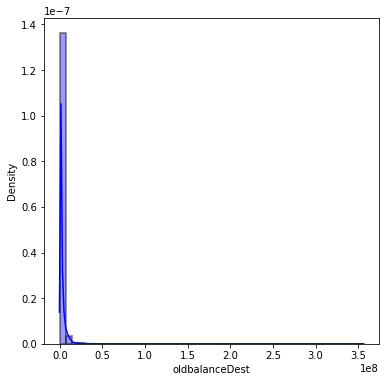

In [38]:
plt.figure(figsize=[6, 6])
sns.distplot(dataset['oldbalanceDest'], color = 'b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)

In [39]:
dataset.loc[dataset['nameDest'].str.startswith('M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [40]:
dataset.loc[~dataset['nameDest'].str.startswith('M')]['oldbalanceDest'].describe()

count    4.055226e+06
mean     1.651459e+06
std      4.063505e+06
min      0.000000e+00
25%      1.309067e+05
50%      5.403535e+05
75%      1.676901e+06
max      3.560159e+08
Name: oldbalanceDest, dtype: float64

In [41]:
dataset.loc[~dataset['nameDest'].str.startswith('M')]['newbalanceDest'].describe()

count    4.055226e+06
mean     1.851962e+06
std      4.397153e+06
min      0.000000e+00
25%      2.227342e+05
50%      6.846676e+05
75%      1.910200e+06
max      3.561793e+08
Name: newbalanceDest, dtype: float64

Strategy : We have found all the rows with 'M's in there customer ID, we will have to impute all those 0.0s with median of the remaining values.

In [42]:
med_oldbalanceDest = dataset[~dataset['nameDest'].str.startswith('M')]['oldbalanceDest'].median()
dataset.loc[dataset['nameDest'].str.startswith('M'), 'oldbalanceDest'] = med_oldbalanceDest

In [43]:
med_newbalanceDest = dataset[~dataset['nameDest'].str.startswith('M')]['newbalanceDest'].median()
dataset.loc[dataset['nameDest'].str.startswith('M'), 'newbalanceDest'] = med_newbalanceDest

In [44]:
dataset['isFlaggedFraud'].value_counts()

0    6206679
1         10
Name: isFlaggedFraud, dtype: int64

We will drop this feature

In [45]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,540353.5,684667.645,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,540353.5,684667.645,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.000,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.000,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,540353.5,684667.645,0,0


In [46]:
display(dataset.describe())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.206689e+06,6.206689e+06,6.206689e+06,6.206689e+06,6.206689e+06,6.206689e+06,6.206689e+06,6.206689e+06
mean,2.436754e+02,1.802608e+05,4.585179e+05,4.763379e+05,1.266310e+06,1.447336e+06,1.314066e-03,1.611165e-06
std,1.425940e+02,6.103315e+05,1.436422e+06,1.474587e+06,3.326859e+06,3.597409e+06,3.622623e-02,1.269316e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.301407e+04,0.000000e+00,0.000000e+00,3.131448e+05,4.232226e+05,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.259364e+04,1.189500e+04,0.000000e+00,5.403535e+05,6.846676e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.080536e+05,9.902900e+04,1.146816e+05,9.099508e+05,1.090811e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,1.959384e+07,9.627251e+06,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Let's analyse some features

In [47]:
dataset['oldbalanceOrg'].value_counts()

0.00          2102449
184.00            918
133.00            914
195.00            912
164.00            909
               ...   
3026748.98          1
6378660.64          1
487776.92           1
3026839.23          1
617029.60           1
Name: oldbalanceOrg, Length: 1689924, dtype: int64

In [48]:
dataset['newbalanceOrig'].value_counts()

0.00          3609566
15073.44            4
36875.73            4
366.96              4
45633.24            4
               ...   
161971.20           1
282237.12           1
163661.30           1
3266471.84          1
859672.40           1
Name: newbalanceOrig, Length: 2526670, dtype: int64

In [49]:
dataset.loc[dataset['oldbalanceOrg'] == 0.0, :]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
29,1,PAYMENT,9920.52,C764826684,0.0,0.0,M1940055334,540353.50,684667.645,0,0
30,1,PAYMENT,3448.92,C2103763750,0.0,0.0,M335107734,540353.50,684667.645,0,0
31,1,PAYMENT,4206.84,C215078753,0.0,0.0,M1757317128,540353.50,684667.645,0,0
32,1,PAYMENT,5885.56,C840514538,0.0,0.0,M1804441305,540353.50,684667.645,0,0
33,1,PAYMENT,5307.88,C1768242710,0.0,0.0,M1971783162,540353.50,684667.645,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6356052,709,CASH_OUT,123403.11,C1054278487,0.0,0.0,C1948756721,606875.62,730278.740,0,0
6356244,709,PAYMENT,14499.40,C1009494758,0.0,0.0,M840318507,540353.50,684667.645,0,0
6362461,730,CASH_OUT,0.00,C729003789,0.0,0.0,C1388096959,1008609.53,1008609.530,1,0
6362463,730,CASH_OUT,0.00,C2088151490,0.0,0.0,C1156763710,0.00,0.000,1,0


In [50]:
dataset.loc[dataset['newbalanceOrig'] == 0.0, :]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.000,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.000,1,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.0,M1176932104,540353.50,684667.645,0,0
10,1,DEBIT,9644.94,C1900366749,4465.00,0.0,C997608398,10845.00,157982.120,0,0
13,1,PAYMENT,11633.76,C1716932897,10127.00,0.0,M801569151,540353.50,684667.645,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.130,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.000,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.110,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.000,1,0


Grouping these zero values of 'oldbalanceOrg' with type feature

In [51]:
dataset.loc[dataset['oldbalanceOrg'] == 0, :].groupby(['type']).size()

type
CASH_IN       13464
CASH_OUT    1025799
DEBIT          6158
PAYMENT      774245
TRANSFER     282783
dtype: int64

Doing the same with 'newbalanceOrig'

In [52]:
dataset.loc[dataset['newbalanceOrig'] == 0, :].groupby(['type']).size()

type
CASH_OUT    1985211
DEBIT         11786
PAYMENT     1101124
TRANSFER     511445
dtype: int64

In [53]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,540353.5,684667.645,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,540353.5,684667.645,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.000,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.000,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,540353.5,684667.645,0,0


We are seeing a lot of 0.0 values this might be actually zero or these can be missing values, we will need to impute them if that is the case, but for now let's treat them actual 0.0s

Checking the correlation of these zero values with the customer ID

In [54]:
dataset.loc[(dataset['oldbalanceOrg'] == 0) & (dataset['nameOrig'].str.startswith('C')), :]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
29,1,PAYMENT,9920.52,C764826684,0.0,0.0,M1940055334,540353.50,684667.645,0,0
30,1,PAYMENT,3448.92,C2103763750,0.0,0.0,M335107734,540353.50,684667.645,0,0
31,1,PAYMENT,4206.84,C215078753,0.0,0.0,M1757317128,540353.50,684667.645,0,0
32,1,PAYMENT,5885.56,C840514538,0.0,0.0,M1804441305,540353.50,684667.645,0,0
33,1,PAYMENT,5307.88,C1768242710,0.0,0.0,M1971783162,540353.50,684667.645,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6356052,709,CASH_OUT,123403.11,C1054278487,0.0,0.0,C1948756721,606875.62,730278.740,0,0
6356244,709,PAYMENT,14499.40,C1009494758,0.0,0.0,M840318507,540353.50,684667.645,0,0
6362461,730,CASH_OUT,0.00,C729003789,0.0,0.0,C1388096959,1008609.53,1008609.530,1,0
6362463,730,CASH_OUT,0.00,C2088151490,0.0,0.0,C1156763710,0.00,0.000,1,0


There are a lot of 0.0 values with customers who have ID starting with 'C's, we will have to check this out. This is true for both columns for 'oldbalanceOrg' and 'newbalanceOrig'. Seems like there isn't a single value in these columns which is zero and have IDs starting with 'M'

In [56]:
dataset.loc[(dataset['oldbalanceOrg'] == 0) & (dataset['nameOrig'].str.startswith('C')), :].groupby([target, 'type']).size().unstack()

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,13464.0,1025762.0,6158.0,774245.0,282779.0
1,NaN,37.0,NaN,NaN,4.0


In [57]:
dataset.loc[(dataset['newbalanceOrig'] == 0) & (dataset['nameOrig'].str.startswith('C')), :].groupby([target, 'type']).size().unstack()

type,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,
0,1981096.0,11786.0,1101124.0,507507.0
1,4115.0,NaN,NaN,3938.0


In [58]:
dataset.groupby([target, 'type']).size().unstack()

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,1243460.0,2233372.0,41432.0,2151463.0,528806.0
1,NaN,4116.0,NaN,NaN,4040.0


As we can observe that we are seeing a weird trend that most of the fraudulent transactions happened with people having customer ID starting with 'C's. And no fraud transactions happened with transaction types other then CASH_OUT, TRANSFER. This might be due to the fact that we don't have data about others or it might actually be the case.

Let's create a new column containing binary variable for 'nameOrig' and 'nameDest' starting with C or not.

In [59]:
dataset['nameOrig'].str.startswith('C').value_counts()

True    6206689
Name: nameOrig, dtype: int64

As we can see all the customer IDs in this column starts with 'C' so we won't make a new column for this feature

In [61]:
dataset[dataset['nameDest'].str.startswith('C') & dataset[target] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [62]:
dataset[target].value_counts()

0    6198533
1       8156
Name: isFraud, dtype: int64

As we can see all the fraud transactions have their 'nameDest' customer ID starting with 'C', so we will make a new column out it

In [63]:
dataset['nameDest_startswith_C'] = dataset['nameDest'].str.startswith('C')

In [64]:
dataset['nameDest_startswith_C'].value_counts()

True     4055226
False    2151463
Name: nameDest_startswith_C, dtype: int64

In [65]:
dataset.groupby([target, 'nameDest_startswith_C']).size().unstack()

nameDest_startswith_C,False,True
isFraud,,
0,2151463.0,4047070.0
1,NaN,8156.0


In [66]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_startswith_C
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,540353.5,684667.645,0,0,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,540353.5,684667.645,0,0,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.000,1,0,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.000,1,0,True
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,540353.5,684667.645,0,0,False


In [67]:
dataset.shape

(6206689, 12)

Encoding categorical variables

Encoding 'nameDest_startswith_C' first, then we'll move on to 'type'

In [68]:
dataset['nameDest_startswith_C'].value_counts()

True     4055226
False    2151463
Name: nameDest_startswith_C, dtype: int64

In [69]:
from sklearn.preprocessing import OrdinalEncoder
dataset[['nameDest_startswith_C']] = OrdinalEncoder(categories=[[False, True]]).fit_transform(dataset[['nameDest_startswith_C']])

In [70]:
dataset = pd.get_dummies(dataset, columns=['type'], drop_first=True)

In [71]:
dataset.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_startswith_C,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,540353.5,684667.645,0,0,0.0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,540353.5,684667.645,0,0,0.0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.000,1,0,1.0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.000,1,0,1.0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,540353.5,684667.645,0,0,0.0,0,0,1,0


In [72]:
dataset.shape

(6206689, 15)

CASH_IN, DEBIT, PAYMENT do not have any fraudulent transactions associated with them, so it would be good to drop their columns.

In [73]:
dataset = dataset.drop(['type_DEBIT', 'type_PAYMENT'], axis=1)

In [74]:
dataset.shape

(6206689, 13)

Splitting the dataset into training set and test set

In [75]:
from sklearn.model_selection import train_test_split

X = dataset.drop([target], axis=1)
y = dataset[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04, random_state=403)
X_train.reset_index(drop=True, inplace=True)

print('Original dataset size --> ({}, {})'.format(dataset.shape[0], dataset.shape[1]))
print('Training set size --> ({}, {})'.format(X_train.shape[0], X_train.shape[1]))
print('Testing set size --> ({}, {})'.format(X_test.shape[0], X_test.shape[1]))

Original dataset size --> (6206689, 13)
Training set size --> (5958421, 12)
Testing set size --> (248268, 12)


In [76]:
X_train.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDest_startswith_C,type_CASH_OUT,type_TRANSFER
0,42,7239.66,C1653777573,10687.00,3447.34,C78102107,40021.09,47260.760,0,1.0,1,0
1,303,16128.56,C199016460,20319.00,4190.44,M1186108292,540353.50,684667.645,0,0.0,0,0
2,249,102995.36,C1753251596,0.00,0.00,C605769476,4664358.29,4767353.650,0,1.0,1,0
3,119,1411011.86,C443987284,18994.98,0.00,C1185117928,5850721.86,7261733.720,0,1.0,0,1
4,335,6530.42,C768695096,0.00,0.00,M1286361780,540353.50,684667.645,0,0.0,0,0


Standardizing the values

In [77]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
print('---- Standardizing the training set -----')
X_train[['step', 'amount', 'oldbalanceOrg'
         , 'newbalanceOrig', 'oldbalanceDest',
         'newbalanceDest']] = std.fit_transform(X_train.loc[:, ['step',
                                              'amount',
                                              'oldbalanceOrg',
                                              'newbalanceOrig',
                                              'oldbalanceDest',
                                              'newbalanceDest']])
X_train_std = pd.DataFrame(X_train, columns=X_train.columns)
display(X_train_std.describe())

print('---- Standardizing the testing set ----')
X_test[['step', 'amount', 'oldbalanceOrg'
         , 'newbalanceOrig', 'oldbalanceDest',
         'newbalanceDest']] = std.transform(X_test.loc[:, ['step',
                                              'amount',
                                              'oldbalanceOrg','newbalanceOrig',
                                              'oldbalanceDest',
                                              'newbalanceDest']])
X_test_std = pd.DataFrame(X_test, columns=X_train.columns)
display(X_test_std.describe())

---- Standardizing the training set -----


c:\users\mansi\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\mansi\anaconda3\envs\project\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDest_startswith_C,type_CASH_OUT,type_TRANSFER
count,5.958421e+06,5.958421e+06,5.958421e+06,5.958421e+06,5.958421e+06,5.958421e+06,5.958421e+06,5.958421e+06,5.958421e+06,5.958421e+06
mean,-3.999412e-17,-1.937768e-16,1.787417e-16,-3.412475e-16,-4.304216e-17,2.226806e-16,1.678297e-06,6.533701e-01,3.604665e-01,8.587510e-02
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.295490e-03,4.758967e-01,4.801358e-01,2.801796e-01
min,-1.701821e+00,-2.949100e-01,-3.191850e-01,-3.230052e-01,-3.802907e-01,-4.018963e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-6.148163e-01,-2.736259e-01,-3.191850e-01,-3.230052e-01,-2.863030e-01,-2.844388e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,-3.274259e-02,-1.761826e-01,-3.109019e-01,-3.230052e-01,-2.180551e-01,-2.118236e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,6.404993e-01,4.533976e-02,-2.502482e-01,-2.452298e-01,-1.070708e-01,-9.904326e-02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,3.501777e+00,1.509033e+02,1.332268e+01,6.206140e+00,1.065098e+02,9.847815e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


---- Standardizing the testing set ----


c:\users\mansi\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\mansi\anaconda3\envs\project\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDest_startswith_C,type_CASH_OUT,type_TRANSFER
count,248268.000000,248268.000000,248268.000000,248268.000000,248268.000000,248268.000000,248268.0,248268.000000,248268.000000,248268.000000
mean,0.001145,-0.002161,0.001250,0.001109,-0.002357,-0.002423,0.0,0.653213,0.361210,0.085255
std,1.000062,0.954521,1.002088,1.001405,0.970969,0.966665,0.0,0.475948,0.480352,0.279261
min,-1.701821,-0.294910,-0.319185,-0.323005,-0.380291,-0.401896,0.0,0.000000,0.000000,0.000000
25%,-0.614816,-0.273596,-0.319185,-0.323005,-0.285415,-0.283601,0.0,0.000000,0.000000,0.000000
50%,-0.032743,-0.176156,-0.310944,-0.323005,-0.218055,-0.211824,0.0,1.000000,0.000000,0.000000
75%,0.640499,0.046098,-0.249991,-0.245202,-0.107656,-0.099784,0.0,1.000000,1.000000,0.000000
max,3.494764,113.108954,11.683852,6.203474,87.189927,88.875655,0.0,1.000000,1.000000,1.000000


Feature selection/Extraction

Correlation heatmap

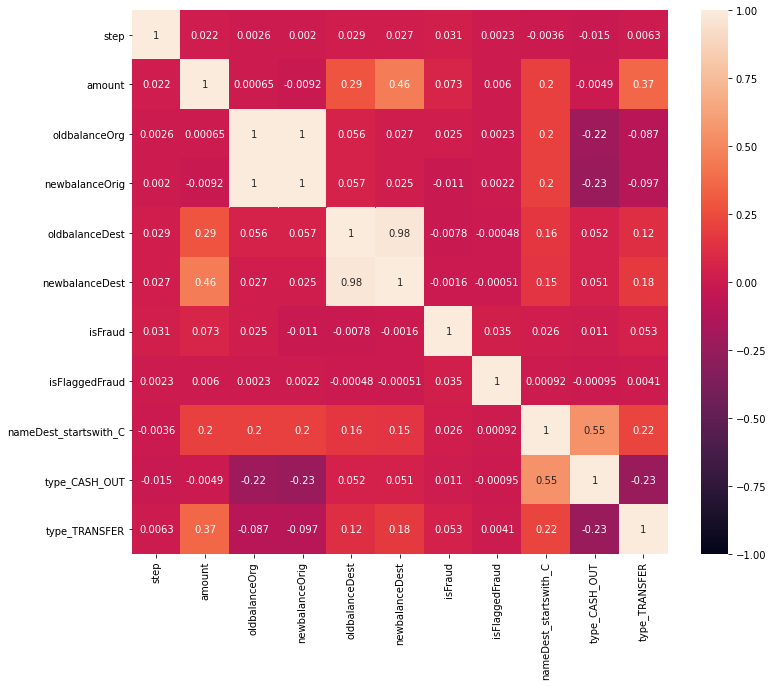

In [78]:
plt.figure(figsize=[12, 10])

sns.heatmap(dataset.corr(), annot=True, vmax=1, vmin=-1)
plt.show()

Since we have a binary target variable, corr heatmap won't be as such useful to figure out which features are better predictors. But we can get the idea about some correlated features, which makes a few features redundant in our predictive model(We will need to remove these redundant feature variable) We can see a few correlated features above.

Testing logistic regression with our data

In [79]:
y_train_ = y_train.values
y_test_ = y_test.values

In [80]:
X_train_std.shape

(5958421, 12)

Computing the class weight for applyting modelling techniques

In [81]:
from sklearn.utils.class_weight import compute_class_weight
compute_class_weight(class_weight='balanced', classes=[0, 1], y = y_train_)

array([  0.50065724, 380.87579903])

In [82]:
X_train_std.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDest_startswith_C,type_CASH_OUT,type_TRANSFER
0,-1.414291,-0.283069,C1653777573,-0.311744,-0.320667,C78102107,-0.368275,-0.388776,0,1.0,1,0
1,0.416085,-0.268531,C199016460,-0.305038,-0.320163,M1186108292,-0.218055,-0.211824,0,0.0,0,0
2,0.037387,-0.126457,C1753251596,-0.319185,-0.323005,C605769476,1.020135,0.921584,0,1.0,1,0
3,-0.874295,2.012855,C443987284,-0.305960,-0.323005,C1185117928,1.376328,1.614056,0,1.0,0,1
4,0.640499,-0.284229,C768695096,-0.319185,-0.323005,M1286361780,-0.218055,-0.211824,0,0.0,0,0


In [83]:
X_train_std = X_train_std.drop(['isFlaggedFraud'], axis=1)
X_test_std = X_test_std.drop(['isFlaggedFraud'], axis=1)

In [84]:
X_train_std.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,nameDest_startswith_C,type_CASH_OUT,type_TRANSFER
0,-1.414291,-0.283069,C1653777573,-0.311744,-0.320667,C78102107,-0.368275,-0.388776,1.0,1,0
1,0.416085,-0.268531,C199016460,-0.305038,-0.320163,M1186108292,-0.218055,-0.211824,0.0,0,0
2,0.037387,-0.126457,C1753251596,-0.319185,-0.323005,C605769476,1.020135,0.921584,1.0,1,0
3,-0.874295,2.012855,C443987284,-0.305960,-0.323005,C1185117928,1.376328,1.614056,1.0,0,1
4,0.640499,-0.284229,C768695096,-0.319185,-0.323005,M1286361780,-0.218055,-0.211824,0.0,0,0


In [85]:
X_train_std = X_train_std.drop(['nameOrig', 'nameDest'], axis=1)
X_test_std = X_test_std.drop(['nameOrig', 'nameDest'], axis=1)

Predictive Modeling

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_leaf=3, class_weight='balanced', n_jobs=-1)
RF.fit(X_train_std, y_train_)

In [ ]:
from sklearn.metrics import f1_score, classification_report
pred1 = RF.predict(X_train_std)
pred2 = RF.predict(X_test_std)

print(f1_score(y_train_, pred1))
print(f1_score(y_test_, pred2))

print(classification_report(y_train_, pred1))
print(classification_report(y_test_, pred2))

0.986789874406195
0.8948247078464107
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5731057
           1       0.97      1.00      0.99      7583

    accuracy                           1.00   5738640
   macro avg       0.99      1.00      0.99   5738640
weighted avg       1.00      1.00      1.00   5738640

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    238795
           1       0.95      0.85      0.89       316

    accuracy                           1.00    239111
   macro avg       0.97      0.92      0.95    239111
weighted avg       1.00      1.00      1.00    239111

Using BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
BC = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', class_weight='balanced'), n_estimators=100, n_jobs=-1)
BC.fit(X_train_std, y_train_)

In [ ]:
from sklearn.metrics import f1_score, classification_report
pred1 = BC.predict(X_train_std)
pred2 = BC.predict(X_test_std)

print(f1_score(y_train_, pred1))
print(f1_score(y_test_, pred2))

print(classification_report(y_train_, pred1))
print(classification_report(y_test_, pred2))

1.0
0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5731057
           1       1.00      1.00      1.00      7583

    accuracy                           1.00   5738640
   macro avg       1.00      1.00      1.00   5738640
weighted avg       1.00      1.00      1.00   5738640

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    238795
           1       0.95      0.85      0.90       316

    accuracy                           1.00    239111
   macro avg       0.98      0.93      0.95    239111
weighted avg       1.00      1.00      1.00    239111

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train_std, y_train_)

In [ ]:
from sklearn.metrics import f1_score, classification_report
pred1 = model.predict(X_train_std)
pred2 = model.predict(X_test_std)

print(f1_score(y_train_, pred1))
print(f1_score(y_test_, pred2))

print(classification_report(y_train_, pred1))
print(classification_report(y_test_, pred2))

0.9339328951919751
0.91
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5731057
           1       0.98      0.89      0.93      7583

    accuracy                           1.00   5738640
   macro avg       0.99      0.95      0.97   5738640
weighted avg       1.00      1.00      1.00   5738640

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    238795
           1       0.96      0.86      0.91       316

    accuracy                           1.00    239111
   macro avg       0.98      0.93      0.95    239111
weighted avg       1.00      1.00      1.00    239111